In [1]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print("Project root added:", project_root)


Project root added: C:\Users\valer\Healthcare_Analytics_Platform


In [2]:
import pandas as pd

# Load raw dataset again (clean and consistent)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


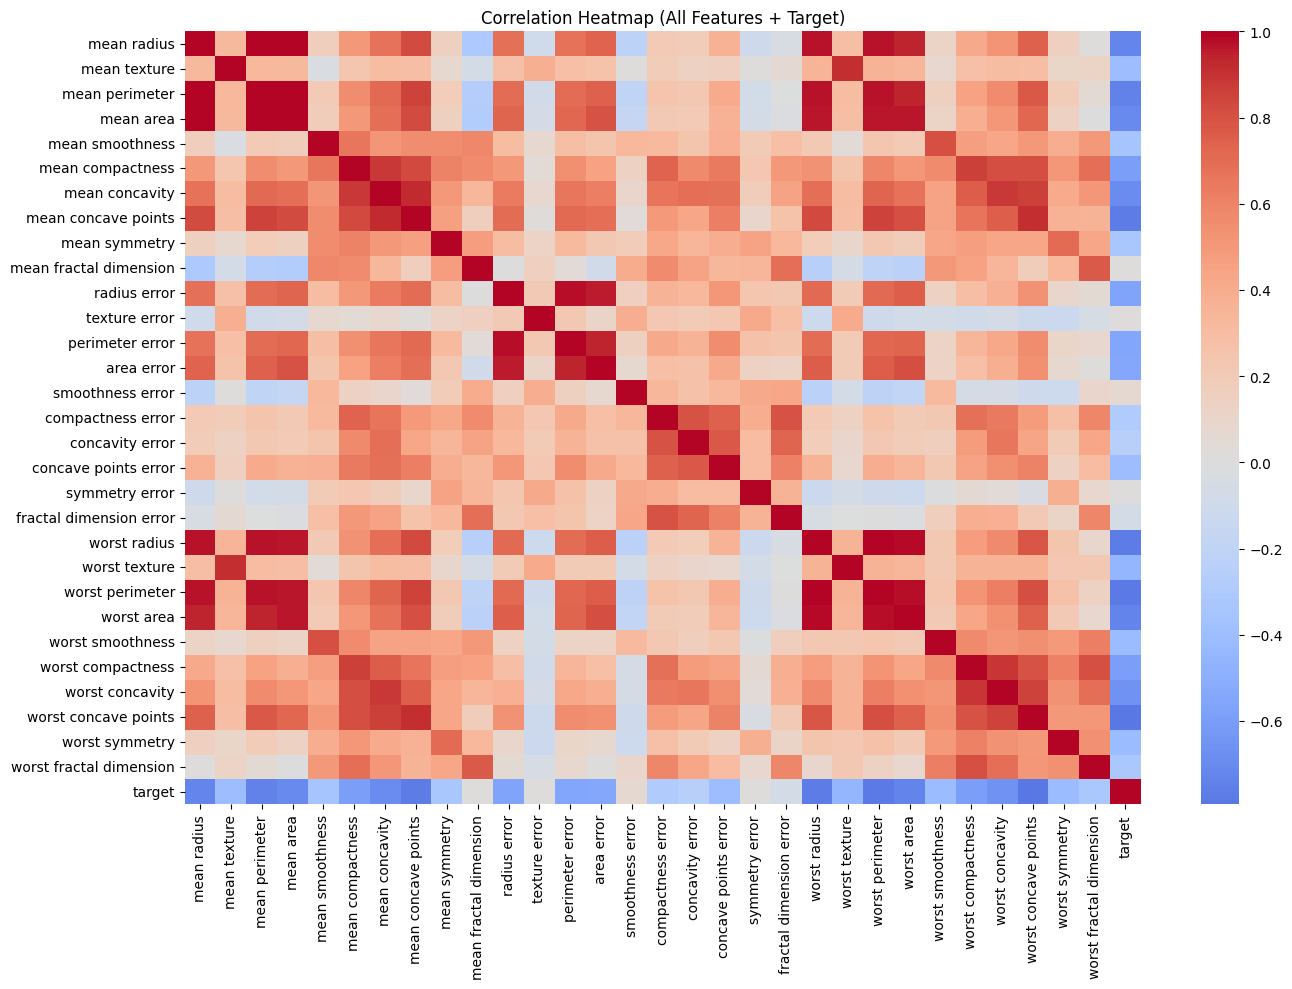

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Features + Target)")
plt.tight_layout()
plt.show()


In [4]:
target_corr = corr["target"].sort_values(ascending=False)
target_corr.head(10)


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64

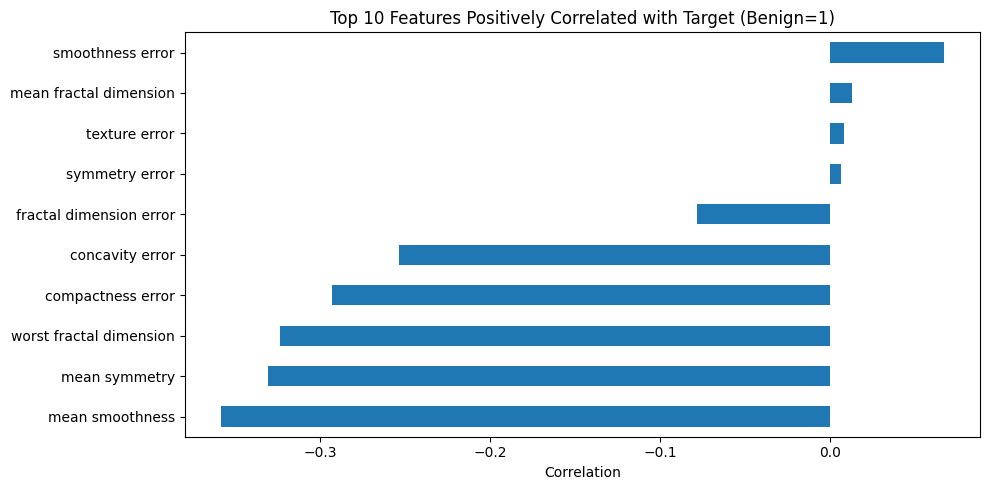

In [5]:
top_pos = target_corr.drop("target").head(10)

plt.figure(figsize=(10, 5))
top_pos.sort_values().plot(kind="barh")
plt.title("Top 10 Features Positively Correlated with Target (Benign=1)")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


## Quick insight
- The heatmap shows strong correlations between related measurements (e.g., radius, perimeter, area).
- Several “worst” and “mean” features have noticeable correlation with the target, suggesting they may be useful for classification.


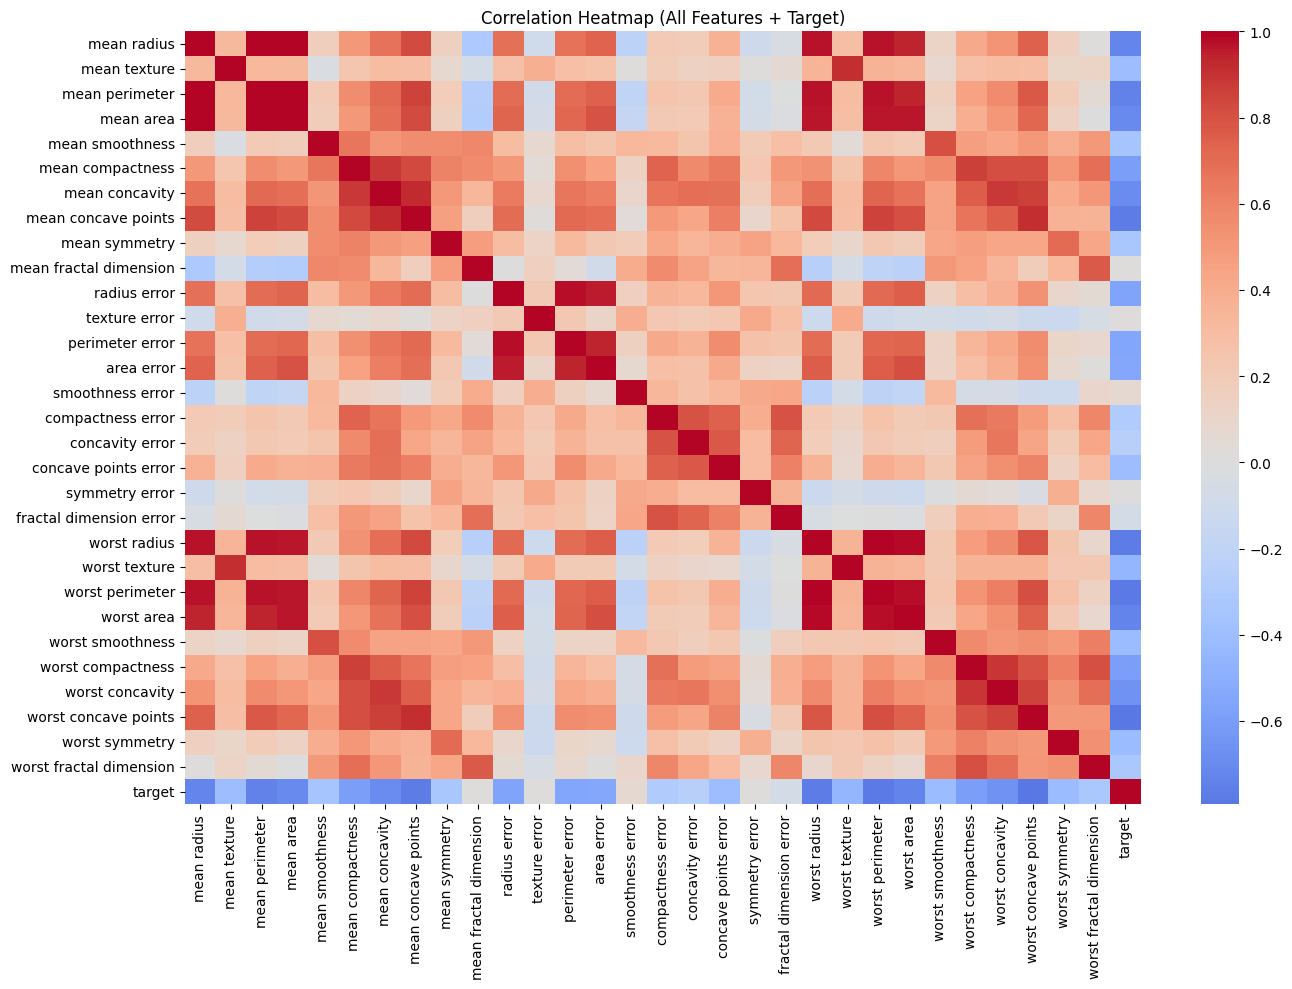

Saved to: ..\reports\figures\correlation_heatmap.png


In [6]:
from pathlib import Path

fig_dir = Path("../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

# Example: save the correlation heatmap again as a file
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Features + Target)")
plt.tight_layout()
plt.savefig(fig_dir / "correlation_heatmap.png", dpi=200)
plt.show()

print("Saved to:", fig_dir / "correlation_heatmap.png")


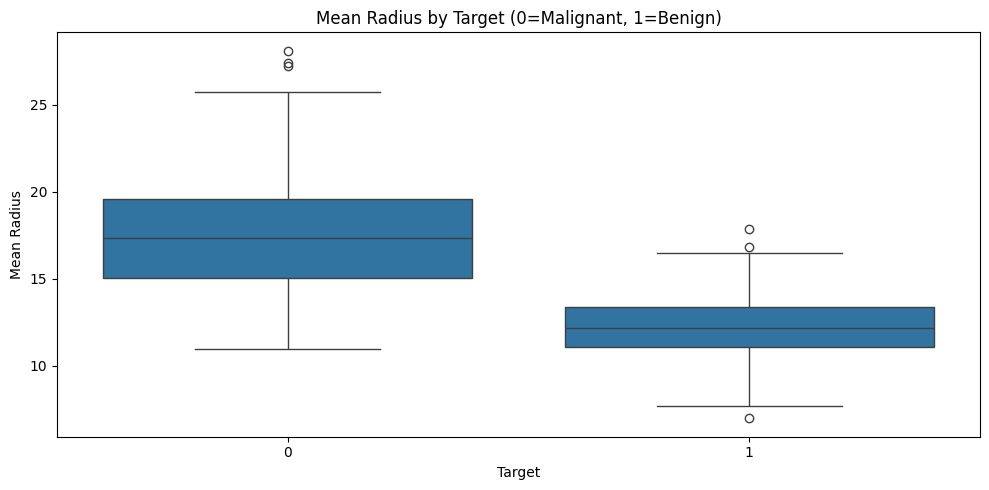

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="target", y="mean radius")
plt.title("Mean Radius by Target (0=Malignant, 1=Benign)")
plt.xlabel("Target")
plt.ylabel("Mean Radius")
plt.tight_layout()
plt.show()


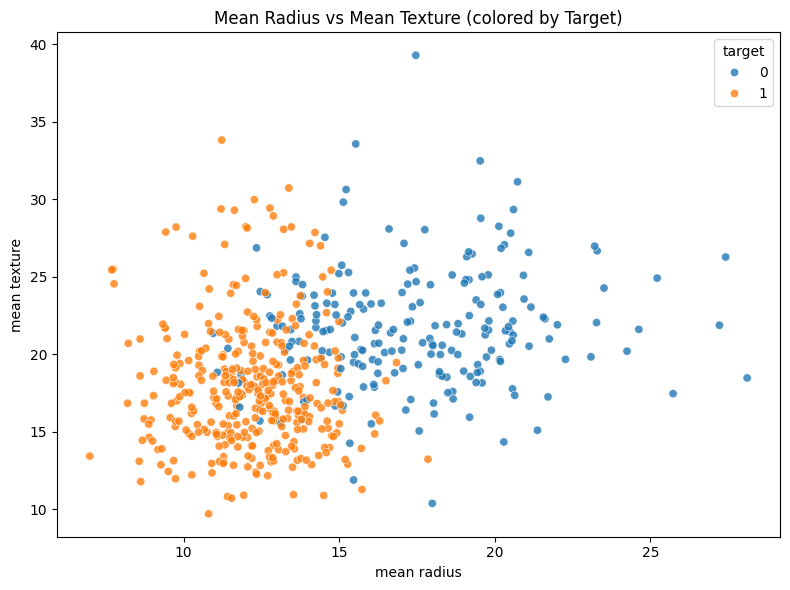

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="mean radius", y="mean texture", hue="target", alpha=0.8)
plt.title("Mean Radius vs Mean Texture (colored by Target)")
plt.tight_layout()
plt.show()


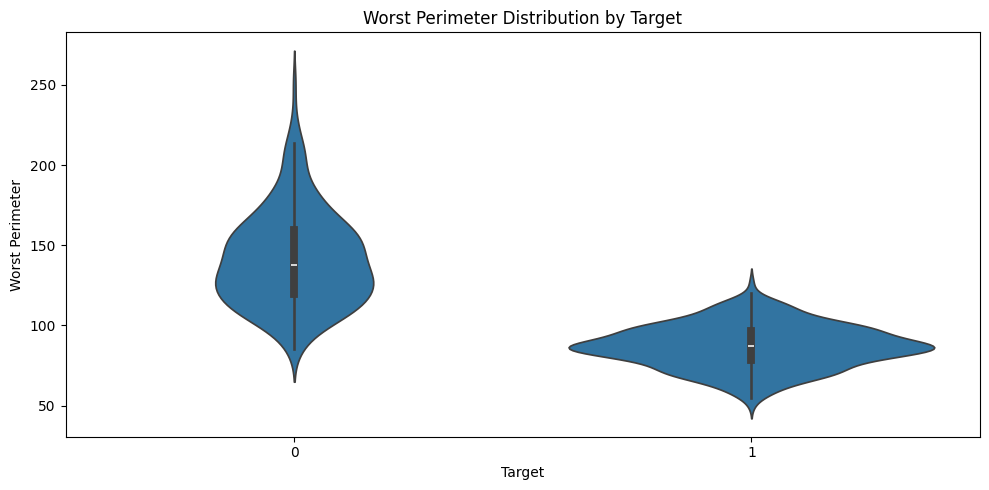

In [9]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="target", y="worst perimeter")
plt.title("Worst Perimeter Distribution by Target")
plt.xlabel("Target")
plt.ylabel("Worst Perimeter")
plt.tight_layout()
plt.show()


In [10]:
from pathlib import Path
fig_dir = Path("../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

# Save boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="target", y="mean radius")
plt.title("Mean Radius by Target")
plt.tight_layout()
plt.savefig(fig_dir / "boxplot_mean_radius_by_target.png", dpi=200)
plt.close()

# Save scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="mean radius", y="mean texture", hue="target", alpha=0.8)
plt.title("Mean Radius vs Mean Texture")
plt.tight_layout()
plt.savefig(fig_dir / "scatter_mean_radius_vs_texture.png", dpi=200)
plt.close()

# Save violin
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="target", y="worst perimeter")
plt.title("Worst Perimeter by Target")
plt.tight_layout()
plt.savefig(fig_dir / "violin_worst_perimeter_by_target.png", dpi=200)
plt.close()

print("Saved 3 figures to:", fig_dir)


Saved 3 figures to: ..\reports\figures


## Insights from visualizations
- Malignant cases (0) generally have higher values in size-related features like radius and perimeter.
- Some feature pairs (e.g., mean radius vs mean texture) show visible separation between classes.
- These patterns suggest Logistic Regression and Decision Tree models should achieve strong performance.
